### Portfolio Project

# Biodiversity in National Parks

I used a pair of provided csv files to perform the analyses below. An initial peek at these file reveals that the category for "conservation status" is missing a great deal of data.

I will use these plain text files as the basis for the following demonstrations of statistical analysis and data representation.
***
The csv's are fairly limited here. While I've included elements of what one could expect to find in an analysis of the topic, I'm doing more of a demonstration of what Python and its libraries are capable of providing to the data scientist. This includes showing alternate visualizations, as well as stripping back and building up the code while playing around with function parameters so that I can learn as much as I can.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Armed with the libraries above, my first task is to read in the plain text files as (pandas) dataframes. I'll also print out the dimensions of each of the dataframes using `.shape`

In [10]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
print(observations.head())
print()
print()
species_info = pd.read_csv('species_info.csv', encoding='utf-8')
print(species_info.head())
print()
print()
print('The dimensions of observations are {} and the dimensions of species_info are {}'.format(observations.shape, species_info.shape))
print()

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domesti

Tearing into `species_info` a bit... 
- How many `category`s of life are there?
- What are the names of the `category`s?
- How are they distributed?

Now examine the names.
- How many `common_names`?
- Are there the same number of `scientific_name`s?

How many categories of `conservation_status`, and what are their names?

In [11]:
print(f'Number of different `category`s: {species_info.category.nunique()}')
print()
print(f'category names: {species_info.category.unique()}')
print()
print(species_info.groupby("category").size())
print()
print()
print(f'The number of species names (scientific): {species_info.scientific_name.nunique()}')
print(f'The number of species names (common names): {species_info.common_names.nunique()}')
print()
print(f'The number of different categories of Conservation Status is {species_info.conservation_status.nunique()}')
print(species_info.conservation_status.unique())
print()

Number of different `category`s: 7

category names: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


The number of species names (scientific): 5541
The number of species names (common names): 5504

The number of different categories of Conservation Status is 4
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']



Commonality of name usage?

In [12]:
print('Duplicate scientific names: {}'.format(species_info.scientific_name.duplicated().sum()))
print('Duplicate common names: {}'.format(species_info.common_names.duplicated().sum()))
print()

Duplicate scientific names: 283
Duplicate common names: 320



There's only one quantitative description in df observations. What other ways can we use .describe()? What other things can it tell us?

In [13]:
print(observations.describe())
print()
print(observations.describe(include='all'))
print()
# The .describe() below yields the same as the first one above sinces there's only one numeric column.
print(observations.observations.describe())
# This one's different:
#print(observations.observations.describe(percentiles=[0.001, 0.01, 0.1, 0.9]))
print()
print(f'There\'s only 4 parks in here: {observations.park_name.unique()}')
print()
print('The sum total of observations in the observations column is {}.\nThis number approximates to the row count, times the mean.'.format(observations.observations.sum()))
print()

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000

         scientific_name                            park_name  observations
count              23296                                23296  23296.000000
unique              5541                                    4           NaN
top     Myotis lucifugus  Great Smoky Mountains National Park           NaN
freq                  12                                 5824           NaN
mean                 NaN                                  NaN    142.287904
std                  NaN                                  NaN     69.890532
min                  NaN                                  NaN      9.000000
25%                  NaN                                  NaN     86.000000
50%                  NaN                                  NaN    124.000000
75%                  NaN                                  N

Note how the word *observation* is used in two distincly different contexts here!

There are over 23,000 *rows*, but there are over 3.3 *million* listed observations in total. The average number of **observations** listed in the observations column is 142, but the standard deviation is high: the maximum number of these listed observations is over 300, but there are as few as 9 in some cases. The other 3 values associated with the *five-number summary* are:
- 86 species observations is a value at the top of the 25th percentile.
- 124 species observations represents the medium percentile.
- 195 is the number of species observations topping the upper percentile - which is 75% in this case since I used the default percentile list. (There are nearly two-and-a-half-million observations of plants and animals where the sum total of observations *for that particular species* was less than 195.)

Precisely how much `conservation_status` information is missing from the `species_info` df?

In [14]:
maxRows = len(species_info)
#print(species_info.count())
#print()
#print(maxRows)
print('~{}%'.format(round((1 - species_info.conservation_status.count() / maxRows) * 100)))
print()

~97%



Before beginning any sort of **analysis**, I want to git rid of the Conservation Status nan's.

In [15]:
species_info.fillna('not categorized', inplace=True)
print(species_info.groupby('conservation_status').size())
print()
# Species count by status (x by y, row by column)
count_by_status = species_info.groupby(['category', 'conservation_status'])['common_names'].count().unstack()
print(count_by_status)
print()
print()
#Status by species count (x by y, row by column)
status_by_count = species_info.groupby(['conservation_status', 'category'])['common_names'].count().unstack()
print(status_by_count)
print()

conservation_status
Endangered              16
In Recovery              4
Species of Concern     161
Threatened              10
not categorized       5633
dtype: int64

conservation_status  Endangered  In Recovery  Species of Concern  Threatened  \
category                                                                       
Amphibian                   1.0          NaN                 4.0         2.0   
Bird                        4.0          3.0                72.0         NaN   
Fish                        3.0          NaN                 4.0         4.0   
Mammal                      7.0          1.0                28.0         2.0   
Nonvascular Plant           NaN          NaN                 5.0         NaN   
Reptile                     NaN          NaN                 5.0         NaN   
Vascular Plant              1.0          NaN                43.0         2.0   

conservation_status  not categorized  
category                              
Amphibian                       

Time for a couple of bar plots.

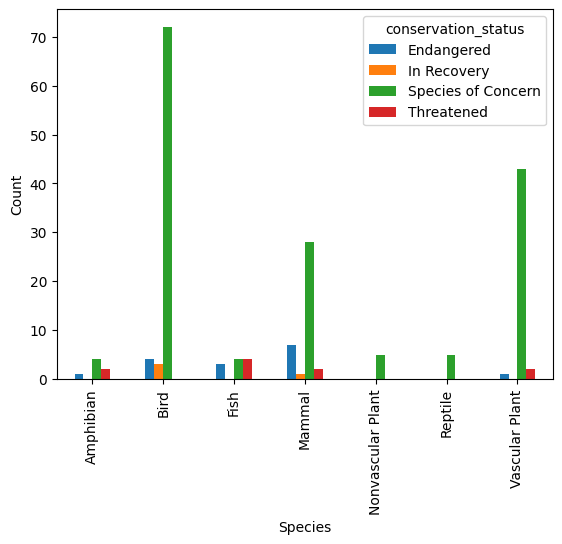

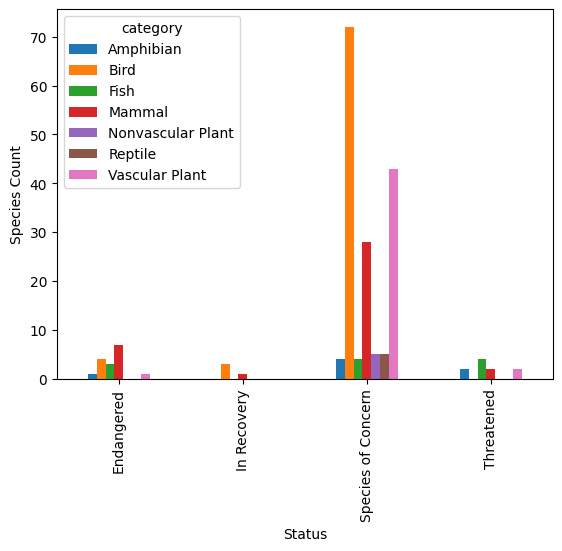

In [16]:
#from matplotlib import style
#print(plt.style.available)

# Note how the legend is the y in the plot, in both cases.
count_by_status_wo_nocat = species_info[species_info.conservation_status != 'not categorized']\
    .groupby(['category', 'conservation_status'])['common_names'].count().unstack()
#plt.style.use('fivethirtyeight') 
ax = count_by_status_wo_nocat.plot(kind = 'bar')
ax.set_xlabel('Species')
ax.set_ylabel('Count');

status_by_count_sans_nocat = species_info[species_info.conservation_status != 'not categorized']\
    .groupby(['conservation_status', 'category'])['common_names'].count().unstack()
ax = status_by_count_sans_nocat.plot(kind = 'bar')
ax.set_xlabel('Status')
ax.set_ylabel('Species Count');

I've decided to dig deeper into solution code for additional analysis ideas. I plan to continue to provide a diverse set of solutions so I can really see what this code can do. 

Question: Are some species of plants and animals more likely to be endangered?

In [17]:
# Recharacterize species_info into two conservation categories: protected, and not_protected
species_info['protected'] = species_info.conservation_status != 'not categorized'
# The .pivot() below will essentially create a new df based on the conservation categories above.

# The .groupby() combines plant/animal category and the new column above as a new df. 
# The nunique for the sci names provides a count ofr the "third column."
# The (1st) .reset_index() insures plant/animal category is populated for each T/F count (prepares for pivot).
# PIVOT - make my row labels the plant/animal category (index).
#         make my columns a boolean of 'protected' (columns).
#         make what's being populated here the sci name count (values).
# The 2nd .reset_index() re-sequentializes the new df after the pivot (re-establish a proper index range from zero).
protection_counts = species_info.groupby(['category', 'protected']).scientific_name.nunique().reset_index()\
    .pivot(columns='protected', index='category', values='scientific_name').reset_index()

# Replace the boolean classifications with proper column names. Not_protected comes before protected b/c False comes before True.
# As a result, the old index column header goes away since it's no longer required to define the booleans. (Is this why?) 
protection_counts.columns = ['category', 'not_protected', 'protected']

# Add a column reflecting the approximate percentage of those species left unprotected.
protection_counts['pct_unprotected'] = protection_counts.not_protected / (protection_counts.not_protected + protection_counts.protected) * 100
print(protection_counts)
print()

            category  not_protected  protected  pct_unprotected
0          Amphibian             72          7        91.139241
1               Bird            413         75        84.631148
2               Fish            115         11        91.269841
3             Mammal            146         30        82.954545
4  Nonvascular Plant            328          5        98.498498
5            Reptile             73          5        93.589744
6     Vascular Plant           4216         46        98.920695



Among other things, this table reveals that there are *far more* plant classifications than there are of the listed animal species.

Contingeny tables and the chi-squared tests are suitable for summarizing the relationship between two categorical variables.

In [18]:
# Contingency table of Mammal and Bird, versus potected and not_protected.
c_table = [[30,146],[75,413]]
c_table

from scipy.stats import chi2_contingency

print(chi2_contingency(c_table))
print()

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))



The p-value here is >> 0.05. This indicates independence between the two variables, or essentially no relationship existing between these two categories and their protected status.

In [19]:
# Contingency table of Mammal and Reptile, versus potected and not_protected.
c_table2 = [[30,146],[5,73]]
c_table2

print(chi2_contingency(c_table2))
print()

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))



Here the p-value is only 3.8%. This indicate statistical significance. 

Looking back at the *this* contingency table, we see that mammals in general are 6 times more likely to be protected. This largely outweighs the fact that mammals are twice as likely to be unprotected, and so we can conclude that **mammals receive a statistically higher rate of protection than do reptiles**.

## Some More Analysis

Let's look at some different species and see in which parks they appear based on the observation data. I'll focus on mammals (since they're my species). I want to use the `common_names`.

One of the problems I'm going to have relates to punctuation. If I attempt to split the words out to a list without dropping the commas, let's say, then, when I try to remove repeats I'll miss some. For example:

 `['Mountain', 'Goat,', 'Mountain', 'Goat,', 'Rocky', 'Mountain', 'Goat']`
 
 will become  `['Mountain', 'Goat,', 'Rocky', 'Goat']`

 Two `Goat`s - yikes! Fortunately the `string` library includes a pre-initialized string *constant* that provide all the different puncuation:  **'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'**
 
I can use this to create my own function that strips out all of the dashes, parentheses, commas and apostrophes. Once this is done I can more easily take care of the nouns and adjectives that repeat within each common name.

In [20]:
import string

def clean_out_punc(text_string):
    for punc in string.punctuation:
        text_string = text_string.replace(punc, '')
    return text_string
    
common_nomenclature = species_info[species_info.category == "Mammal"].common_names.apply(clean_out_punc).str.split().tolist()

common_nomenclature[86:96]

[['Water', 'Shrew'],
 ['StarNosed', 'Mole'],
 ['HairyTailed', 'Mole'],
 ['Eastern', 'Mole'],
 ['Antelope', 'Pronghorn'],
 ['Bison', 'Buffalo'],
 ['Mountain', 'Goat', 'Mountain', 'Goat', 'Rocky', 'Mountain', 'Goat'],
 ['Bighorn', 'Sheep', 'Bighorn', 'Sheep'],
 ['Eurasian', 'Elk', 'Moose'],
 ['Yellowstone', 'Moose']]

Lots of repeats in here. Now I'll try creating a common list. The new list will be appended inside of a loop. Each item in the list is another list containing the words within each name. By transforming each sublist to a dictionary, repeats are removed since dictionaries cannot contain duplicate values (as keys).

In [21]:
cleanNoman = []

for item in common_nomenclature:
    item = list(dict.fromkeys(item))
    cleanNoman.append(item)
    
cleanNoman[86:96]

[['Water', 'Shrew'],
 ['StarNosed', 'Mole'],
 ['HairyTailed', 'Mole'],
 ['Eastern', 'Mole'],
 ['Antelope', 'Pronghorn'],
 ['Bison', 'Buffalo'],
 ['Mountain', 'Goat', 'Rocky'],
 ['Bighorn', 'Sheep'],
 ['Eurasian', 'Elk', 'Moose'],
 ['Yellowstone', 'Moose']]

With all of this done, I can now go on to join all of the sublists into one giant list. If there are repeat values in here, then it should be representative of separate and unique species. I'll use the `itertools.chain()` function.

In [22]:
from itertools import chain

# This nested argument here is expected to produce iterables regardless of whether or not i is a list class. 
big_list = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanNoman))

#for item in big_list:
#    print(item)

From the common list, I can tabulate instances of each word

'set()' creates a set object. Sets are mutable, unordered and unique (no dupes).

In [23]:
word_count = []

for i in big_list:
    number_of_eyes = big_list.count(i)
    word_count.append((i, number_of_eyes))     # Append the word, and the number of times it appears (append a pair to a).
                                            # So the word instance and its count will appear its-count number of times in word_count.
                                        # The set object created below will automatically remove these duplicates!!

word_count_set = pd.DataFrame(set(word_count), columns =['Word', 'Count']).sort_values("Count", ascending = False)
print(word_count_set.head())
print()

         Word  Count
58        Bat     23
147     Shrew     18
118    Myotis     17
45      Mouse     16
197  Chipmunk     13



I wanted to learn more about Elk (Wapiti), but there are only 3 instances of the word. The word Red shows up a lot more. And there is only one instance of Goat.

I'll isolate all three by creating new boolean columns. Later I can merge `species_info` with `observations` to find which of the parks is... the reddest.

In [24]:
# Using .contains() string attribute (str) with regex. For the regex, I can use the raw-string prefix, r, or escape, \.
species_info['with_elk'] = species_info.common_names.str.contains(r"\bElk\b", regex = True)

species_info.head(10)
species_info[species_info.with_elk]

,category,scientific_name,common_names,conservation_status,protected,with_elk
4,Mammal,Cervus elaphus,Wapiti Or Elk,not categorized,False,True
3015,Mammal,Alces alces,"Eurasian Elk, Moose",not categorized,False,True
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,not categorized,False,True
3436,Vascular Plant,Cirsium foliosum,"Drummond's Thistle, Elk Thistle, Leafy Thistle...",not categorized,False,True
4087,Vascular Plant,Carex geyeri,"Elk Sedge, Geyer's Sedge",not categorized,False,True


Cervus elaphus shows up twice with 3 different names. Also... a thistle, a grass, and a Eurasian moose. (So 5 instances here, but recall how `word_count_set` was built from the `category` **Mammal**.) Moose are called elk/elks in Eurasia, but are a distinct species as shown above. 

In [25]:
species_info['with_red'] = species_info.common_names.str.contains(r'\bRed\b', regex = True)
#species_info['with_red'] = species_info.common_names.str.contains(r'\bRed-\b', regex = True)

for item in range(len(species_info)):
    if (species_info.category[item] == 'Mammal') and species_info.with_red[item]:
        print(species_info.common_names[item])
print()

Gapper's Red-Backed Vole
Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)
Red Wolf
Black Fox, Cross Fox, Red Fox, Silver Fox
Red Fox
Eastern Red Bat, Red Bat
Southern Red-Backed Vole
Red Squirrel
Sierra Nevada Red Fox
Western Red Bat



The filter gives me 10 returns even though there are 8 in `word_count_set`. This is because my `replace` function replaced punctuation with the empty string. The commented out filter above will give me 2 returns. 

In [26]:
species_info['with_goat'] = species_info.common_names.str.contains('\\bGoat\\b', regex = True)

for item in range(len(species_info)):
    if (species_info.category[item] == 'Mammal') and species_info.with_goat[item]:
        print(species_info.common_names[item])
print()

Mountain Goat, Mountain Goat, Rocky Mountain Goat



This is one item in `species_info`

In [27]:
# Where are certain plants and animals?
parks_with_elk = observations.merge(species_info[species_info.with_elk])
parks_with_red = observations.merge(species_info[species_info.with_red])
parks_with_a_goat = observations.merge(species_info[species_info.with_goat])
parks_with_elk
parks_with_red
#parks_with_a_goat
#parks_with_elk.observations.sum()

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#print(parks_with_red)

,scientific_name,park_name,observations,category,common_names,conservation_status,protected,with_elk,with_red,with_goat
0,Rubus idaeus ssp. strigosus,Yosemite National Park,150,Vascular Plant,American Red Raspberry,not categorized,False,False,True,False
1,Rubus idaeus ssp. strigosus,Great Smoky Mountains National Park,99,Vascular Plant,American Red Raspberry,not categorized,False,False,True,False
2,Rubus idaeus ssp. strigosus,Yellowstone National Park,245,Vascular Plant,American Red Raspberry,not categorized,False,False,True,False
3,Rubus idaeus ssp. strigosus,Bryce National Park,45,Vascular Plant,American Red Raspberry,not categorized,False,False,True,False
4,Amaranthus retroflexus,Yellowstone National Park,247,Vascular Plant,"Green Amaranthus, Red-Root Amaranth",not categorized,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
371,Ovis aries,Yellowstone National Park,221,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",not categorized,False,False,True,False
372,Agelaius phoeniceus,Yellowstone National Park,250,Bird,Red-Winged Blackbird,not categorized,False,False,True,False
373,Agelaius phoeniceus,Bryce National Park,97,Bird,Red-Winged Blackbird,not categorized,False,False,True,False
374,Agelaius phoeniceus,Yosemite National Park,155,Bird,Red-Winged Blackbird,not categorized,False,False,True,False


The `parks_with_elk` dataframe includes 27 rows of species with the word "Elk" in the common name (including plant descriptions). The total number of *recorded* observations in these rows is 4,135.

Rows with Red in the description (376 of them) include a variety of species including categories plants, birds, mammals, etc.

The Mountain Goat is extant in parks in California, Utah, Wyoming (Idaho and Montana), Tennessee and North Carolina.
***
Elk are also on-the-scene in all four parks included in the study. Where are they seen the most?

In [28]:
parks_with_elk.groupby(['park_name', 'category']).observations.sum().reset_index()

,park_name,category,observations
0,Bryce National Park,Mammal,467
1,Bryce National Park,Vascular Plant,229
2,Great Smoky Mountains National Park,Mammal,366
3,Great Smoky Mountains National Park,Vascular Plant,162
4,Yellowstone National Park,Mammal,1187
5,Yellowstone National Park,Vascular Plant,526
6,Yosemite National Park,Mammal,919
7,Yosemite National Park,Vascular Plant,279


These numbers really don't tell us that much, especially without knowing more about observation methodology. It's known that elk are mostly found in the western US and Canada, but Yellowstone NP is much, much larger that the other 3 parks (Bryce Canyon NP is among the smallest in the country). 

The 919 observations of elk at Yosemite, compared to only 366 in the Great Smoky Mountains is perhaps the most validating of what we already know in that, while both parks are between 500 thousand and 800 thousand acres in size, there are two-and-a-half times more elk observations in the Sierras than are documented in eastern Tennessee.

In [29]:
# To create a plot of observations by national park with a breakout of "protected," I prefer a set of like-species that are all mammals.
# I choose Myotis.
species_info['with_myotis'] = species_info.common_names.str.contains(r"\bMyotis\b", regex = True)
species_info['with_myotis']
parks_with_myotis = observations.merge(species_info[species_info.with_myotis])
nps_by_observations = parks_with_myotis.groupby(['park_name', 'protected']).observations.sum().reset_index()
nps_by_observations

,park_name,protected,observations
0,Bryce National Park,False,402
1,Bryce National Park,True,2164
2,Great Smoky Mountains National Park,False,316
3,Great Smoky Mountains National Park,True,1319
4,Yellowstone National Park,False,1016
5,Yellowstone National Park,True,4774
6,Yosemite National Park,False,516
7,Yosemite National Park,True,2871


I will create a data visualization to show where the Myotis' are better protected.

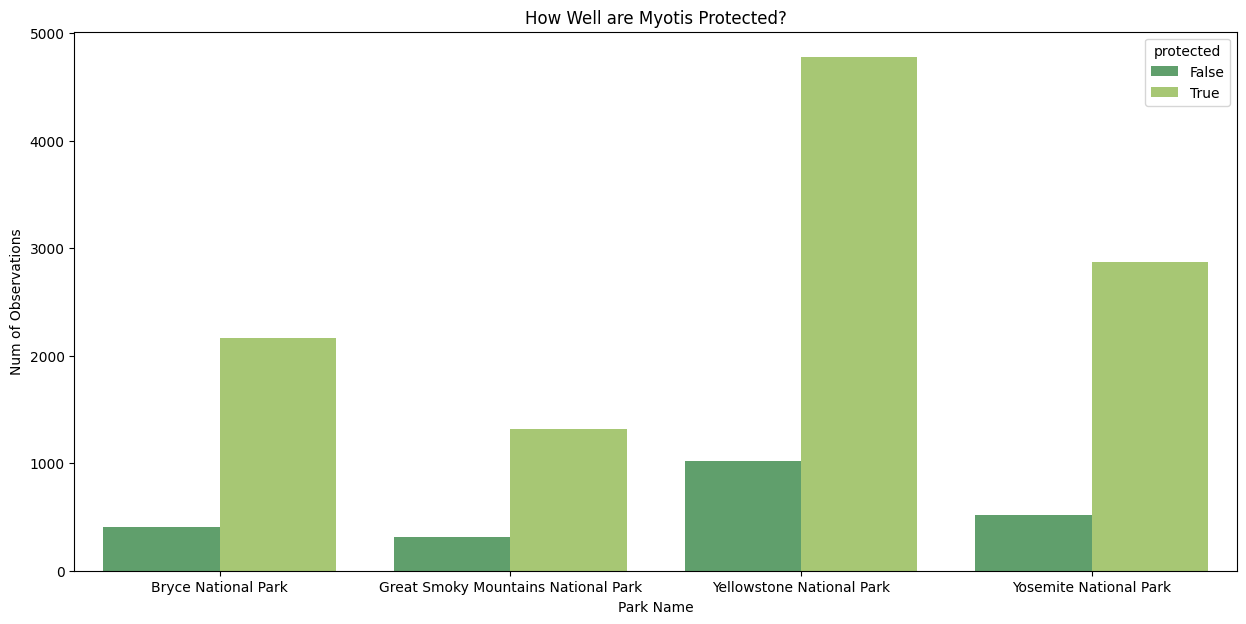

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(15, 7))     # Give it a wide aspect ratio.
sns.barplot(x=nps_by_observations.park_name, y= nps_by_observations.observations, palette='summer', hue=nps_by_observations.protected)
plt.xlabel('Park Name')
plt.ylabel('Num of Observations')
plt.title('How Well are Myotis Protected?')
plt.show()
plt.clf()

The ratio of `protected` to non-protected is highest ay Yellowstone, followed by
- Yosemite
- Bryce Canyon
- and then Great Smoky Mountains National Park